In [12]:
import numpy as np
from sklearn.random_projection import GaussianRandomProjection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import sys
sys.path.append('../')
from Util import loadBeerRaw,loadWine
from mpl_toolkits.mplot3d import axes3d, Axes3D

X_train, X_test, y_train, y_test= loadBeerRaw()
encoder = LabelEncoder()
X_train['SugarScale'] = encoder.fit_transform(X_train['SugarScale']).astype(np.int32)
transformer = GaussianRandomProjection(n_components=3)
rpComponents = transformer.fit_transform(X_train[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale','StyleID']])

In [13]:
rpDf = pd.DataFrame(data = rpComponents
             , columns = ['RP component 1', 'RP component 2','RP component 3'])

In [14]:
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(rpDf)
y_kmeans = kmeans.predict(rpDf)

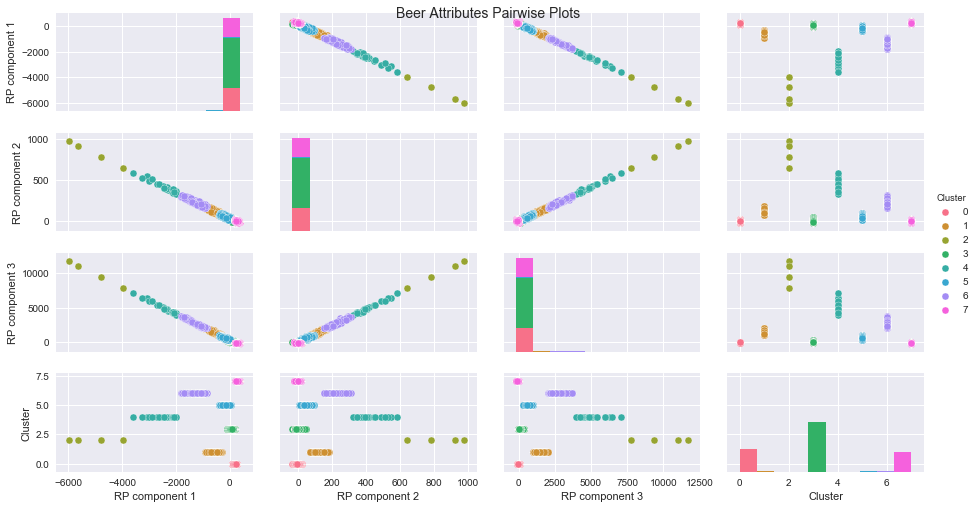

In [15]:
rpDf['Cluster'] =y_kmeans
pp = sns.pairplot(rpDf, hue='Cluster', size=1.8, aspect=1.8)
fig = pp.fig 
t = fig.suptitle('Beer Attributes Pairwise Plots', fontsize=14)

Text(0.5,0,'RP component 2')

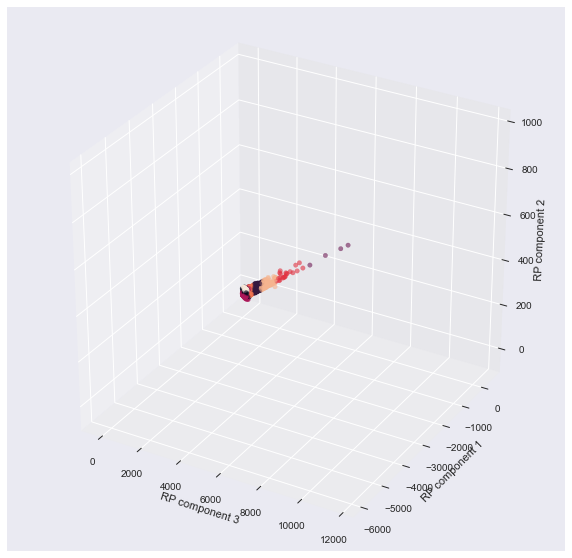

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
xs = rpDf[['RP component 3']].values.flatten()
ys = rpDf[['RP component 1']].values.flatten()
zs = rpDf[['RP component 2']].values.flatten()
ax.scatter(xs, ys,zs,  alpha=0.6, c=y_kmeans)
ax.set_xlabel('RP component 3')
ax.set_ylabel('RP component 1')
ax.set_zlabel('RP component 2')